# Review: Final Team Project Introduction
# Introduction

Music is a form of art that is ubiquitous and has a rich history. Different composers have created music with their unique styles and compositions. However, identifying the composer of a particular piece of music can be a challenging task, especially for novice musicians or listeners. The proposed project aims to use deep learning techniques to identify the composer of a given piece of music accurately.

# Objective

The primary objective of this project is to develop a deep learning model that can predict the composer of a given musical score accurately. The project aims to accomplish this objective by using two deep learning techniques: Long Short-Term Memory (LSTM) and Convolutional Neural Network (CNN).

# Project Timeline

Module 2 (by the end of Week 2): The course instructor will group students into teams of two to three members. Canvas, USD Email, or Slack can be used to find prospective team members.
Module 4 (by the end of Week 4): Each team's representative will need to submit the "Team Project Status Update Form." 
Module 7 (by the end of Week 7): Each team should submit deliverables for the course project in the final week:
Project Report
Project Notebook
It is critical to note that no extensions will be given for any of the final projects' due dates for any reason, and final projects submitted after the final due date will not be graded.
Dataset

The project will use a dataset consisting of musical scores from various composers. The dataset Download dataset will contain MIDI files and sheet music of compositions from well-known classical composers like Bach, Beethoven, Chopin, Mozart, Schubert, etc. The dataset should be labeled with the name of the composer for each score.

# Methodology

The proposed project will be implemented using the following steps:

Data Collection: Data is collected and provided to you.
Data Pre-processing: Convert the musical scores into a format suitable for deep learning models. This involves converting the musical scores into MIDI files and applying data augmentation techniques.
Feature Extraction: Extract features from the MIDI files, such as notes, chords, and tempo, using music analysis tools.
Model Building: Develop a deep learning model using LSTM and CNN architectures to classify the musical scores according to the composer.
Model Training: Train the deep learning model using the pre-processed and feature-extracted data.
Model Evaluation: Evaluate the performance of the deep learning model using accuracy, precision, and recall metrics.
Model Optimization: Optimize the deep learning model by fine-tuning hyperparameters.
Deliverables

Project Report: A comprehensive documentation/report that describes the methodology, data pre-processing steps, feature extraction techniques, model architecture, and training process for reproducibility and future reference. Write your technical report in APA 7 style (here is a Sample Professional Paper  format to follow). Please submit the report in PDF format and use the File naming convention DeliverableName-TeamNumber.pdf; for example, Project_Report-Team1.pdf
Your report should:
contain a reference list that includes any external sources, libraries, or frameworks used during the project, including proper citations or acknowledgments.
include a concluding section or markdown cell that summarizes the project, highlights key findings, and suggests any potential future improvements or extensions to the work.
Project Notebook: A Jupyter Notebook file (.ipynb) that contains the entire project code, including data pre-processing, feature extraction, model building, training, evaluation, and any additional analysis or visualizations performed during the project.
This deliverable will be exported from a Jupyter Notebook and submitted as a PDF or HTML file.
Conclusion

The proposed project aims to use deep learning techniques to accurately predict the composer of a given musical score. The project will be implemented using LSTM and CNN architectures and will involve data pre-processing, feature extraction, model building, training, and evaluation. The final model can be used by novice musicians, listeners, and music enthusiasts to identify the composer of a musical piece accurately.

Power Usage for this Project

You can use Google Colab GPU and TPU in case you need more computation power. Change your runtime in Google Colab notebook to GPU or TPU.
Another option is to buy the subscription in case you need more computational power (recommended).
Please follow this link to do so: Google Colab Pro+ .
NOTE: Team members may not get the same grade on the Final Team Project, depending on each team member's level of contribution.

To understand how your work will be assessed, view the assignment rubric on the Final Team Project page.

**Step 1: Install pretty_midi**

In [1]:
!pip install pretty_midi music21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 24.2 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Building 'pretty_midi' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pretty_midi'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592342 sha256=b9b03a6eff543590ea791faef018aa4d3ff0b33a129311cf90ffe54898d5c5cf
  Stored in directory: /Users/sarangsawant/Library/Caches/pip/wheels/a4/f9/9e/08350c27e386558df0ae234e28a8facd145ba45506ddd1b989
Successfully built prett

**Step 2: Import Libraries**

In [2]:
import zipfile
import os
import numpy as np
import pretty_midi # For MIDI parsing
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import collections # For counting unique notes/tokens
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

/Users/sarangsawant/workspace/.venv/lib/python3.12/site-packages/pretty_midi/instrument.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

**Step 3: Unzip the dataset**

In [4]:
import zipfile
import os
cwd = os.getcwd()
with zipfile.ZipFile(os.path.join(cwd, "Composer_Dataset.zip"), 'r') as zip_ref:
    zip_ref.extractall(cwd)

**Step 4: Set Up Data Directory**

In [8]:
data_dir = os.path.join(cwd,"Composer_Dataset", "NN_midi_files_extended")
print("Data directory ready:", data_dir)

Data directory ready: /Users/sarangsawant/workspace/project_music_composer/Composer_Dataset/NN_midi_files_extended


**Step 5: Inspect Folder Structure**

In [6]:
def print_directory_structure(root_dir, indent=0):
    for item in sorted(os.listdir(root_dir)):
        path = os.path.join(root_dir, item)
        print("  " * indent + f"- {item}")
        if os.path.isdir(path):
            print_directory_structure(path, indent + 1)

print_directory_structure(data_dir)

- .DS_Store
- dev
  - .DS_Store
  - bach
    - .DS_Store
    - bach344.mid
    - bach348.mid
    - bach354.mid
    - bach384.mid
  - bartok
    - .DS_Store
    - bartok410.mid
    - bartok412.mid
    - bartok424.mid
    - bartok434.mid
  - byrd
    - .DS_Store
    - byrd152.mid
    - byrd168.mid
    - byrd180.mid
    - byrd184.mid
  - chopin
    - .DS_Store
    - chopin061.mid
    - chopin069.mid
    - chopin070.mid
    - chopin087.mid
  - handel
    - .DS_Store
    - handel106.mid
    - handel119.mid
    - handel139.mid
    - handel145.mid
  - hummel
    - .DS_Store
    - hummel301.mid
    - hummel303.mid
    - hummel312.mid
    - hummel327.mid
  - mendelssohn
    - .DS_Store
    - mendelssohn258.mid
    - mendelssohn262.mid
    - mendelssohn265.mid
    - mendelssohn270.mid
  - mozart
    - .DS_Store
    - mozart020.mid
    - mozart035.mid
    - mozart039.mid
    - mozart040.mid
  - schumann
    - .DS_Store
    - schumann209.mid
    - schumann217.mid
    - schumann238.mid
- test
  - .

**Step 6: Define Functions to Parse Notes and Transpose for Augmentation**

In [7]:
from music21 import converter, note, chord

# Extract a sequence of notes/chords from a MIDI file
def extract_note_sequence(file_path):
    midi = converter.parse(file_path)
    notes = []
    for element in midi.flatten().notes:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
    return notes

# Augment a note sequence by transposing
def transpose_notes(note_seq, shift):
    transposed = []
    for n in note_seq:
        if '.' in n:
            try:
                chord_notes = [int(p) for p in n.split('.')]
                transposed_chord = [str(p + shift) for p in chord_notes]
                transposed.append('.'.join(transposed_chord))
            except:
                transposed.append(n)
        else:
            try:
                transposed_note = note.Note(n).transpose(shift).pitch
                transposed.append(str(transposed_note))
            except:
                transposed.append(n)
    return transposed

**Step 7: Load MIDI Data and Labels with Split + Augmentation**

In [9]:
from tqdm import tqdm
import glob

X_train_texts, y_train_labels = [], []
X_dev_texts, y_dev_labels = [], []
X_test_texts, y_test_labels = [], []

def is_augmentation_needed(files, split):
    # Augment if less than 20 files in training set
    return len(files) < 20 and split == "train"

for split in ["train", "dev", "test"]:
    split_path = os.path.join(data_dir, split)

    composer_dirs = [
        d for d in glob.glob(os.path.join(split_path, "*"))
        if os.path.isdir(d) and not os.path.basename(d).startswith(".")
    ]

    print(f"[{split.upper()}] contains {len(composer_dirs)} composer folders.")

    for composer_dir in tqdm(composer_dirs, desc=f"Processing {split}"):
        composer = os.path.basename(composer_dir)
        files = [
            f for f in glob.glob(os.path.join(composer_dir, "*.mid")) +
                       glob.glob(os.path.join(composer_dir, "*.midi"))
            if not os.path.basename(f).startswith(".")
        ]

        augmentation = is_augmentation_needed(files, split)

        for file in files:
            try:
                base_seq = extract_note_sequence(file)
                if base_seq:
                    if split == "train":
                        X_train_texts.append(" ".join(base_seq))
                        y_train_labels.append(composer)
                        if augmentation:
                            for shift in [-2, -1, 1, 2]:
                                aug_seq = transpose_notes(base_seq, shift)
                                X_train_texts.append(" ".join(aug_seq))
                                y_train_labels.append(composer)
                    elif split == "dev":
                        X_dev_texts.append(" ".join(base_seq))
                        y_dev_labels.append(composer)
                    elif split == "test":
                        X_test_texts.append(" ".join(base_seq))
                        y_test_labels.append(composer)
            except Exception as e:
                print(f"Error processing {file}: {e}")

[TRAIN] contains 9 composer folders.


Processing train: 100%|██████████| 9/9 [10:36<00:00, 70.74s/it]


[DEV] contains 9 composer folders.


Processing dev: 100%|██████████| 9/9 [00:35<00:00,  3.95s/it]


[TEST] contains 9 composer folders.


Processing test: 100%|██████████| 9/9 [00:49<00:00,  5.48s/it]


**Step 8: Tokenize, Pad, and Prepare Input Sequences**

In [ ]:
# Tokenize, Pad, and Prepare Input Sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Tokenize notes/chords
tokenizer = Tokenizer(filters='', lower=False, split=' ')
tokenizer.fit_on_texts(X_train_texts)

X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_dev_seq = tokenizer.texts_to_sequences(X_dev_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad sequences
MAX_LEN = 1000  # or based on distribution
X_train = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_dev = pad_sequences(X_dev_seq, maxlen=MAX_LEN, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_labels)
y_dev = label_encoder.transform(y_dev_labels)
y_test = label_encoder.transform(y_test_labels)

num_classes = len(label_encoder.classes_)
vocab_size = len(tokenizer.word_index) + 1

**Step 9: Model Architecture + Compiling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Constants
EMBED_DIM = 128
NUM_CLASSES = num_classes
MAX_LEN = X_train.shape[1]  # Already padded
VOCAB_SIZE = vocab_size

# Build CNN + LSTM model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.6),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 🔧 Fix: Explicitly build before summary
model.build(input_shape=(None, MAX_LEN))  # Use shape of X_train
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 1000, 128)      │       153,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 996, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 498, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,393 (907.79 KB)

 Trainable params: 232,393 (907.79 KB)

 Non-trainable params: 0 (0.00 B)

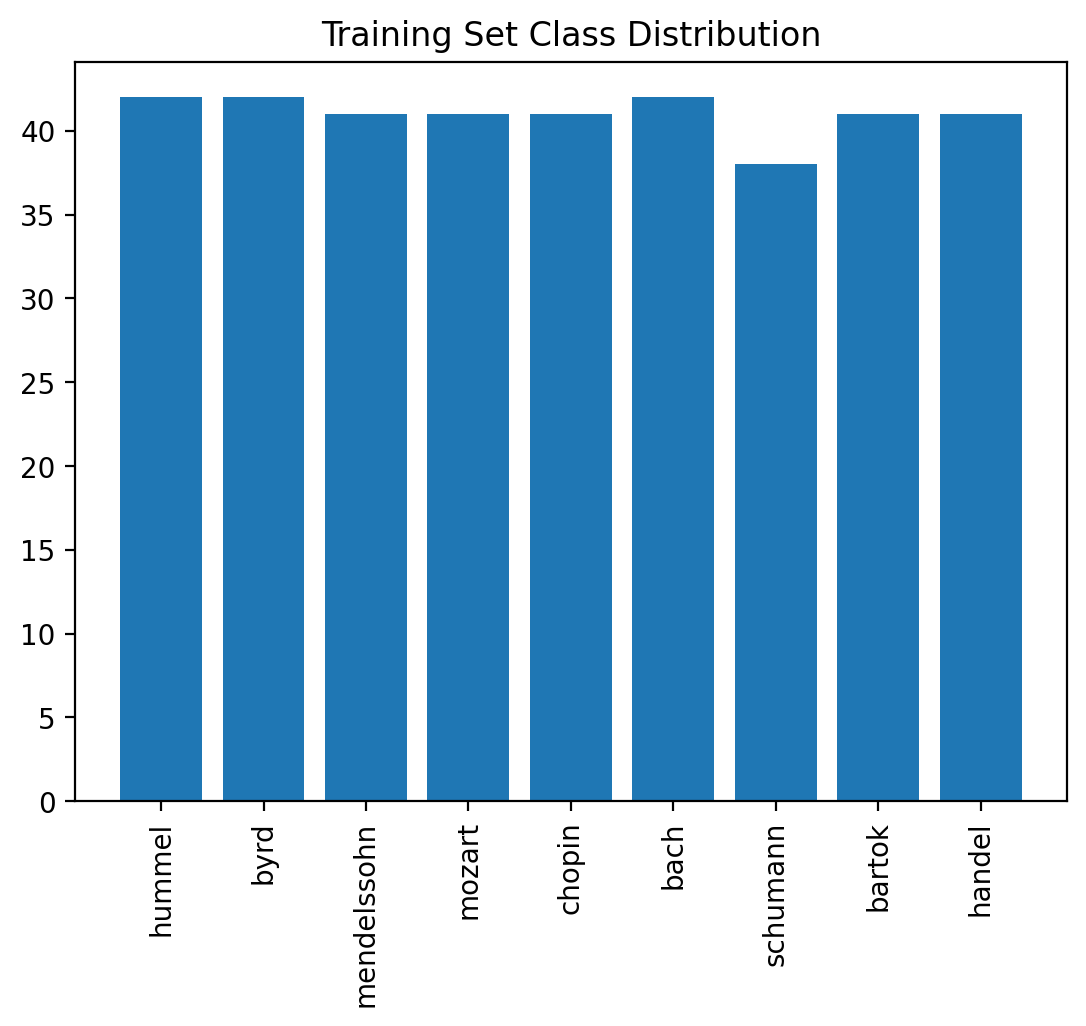

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(y_train_labels)
plt.bar(counter.keys(), counter.values())
plt.title("Training Set Class Distribution")
plt.xticks(rotation=90)
plt.show()

**Step 10: Train the Model**

In [ ]:
callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_dev, y_dev),
    epochs=30,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 584ms/step - accuracy: 0.3559 - loss: 1.9392 - val_accuracy: 0.2286 - val_loss: 2.3444
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 503ms/step - accuracy: 0.3741 - loss: 1.9168 - val_accuracy: 0.2286 - val_loss: 2.3259
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 508ms/step - accuracy: 0.4449 - loss: 1.7334 - val_accuracy: 0.2286 - val_loss: 2.3818
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 580ms/step - accuracy: 0.4425 - loss: 1.7614 - val_accuracy: 0.2857 - val_loss: 2.3529
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 632ms/step - accuracy: 0.3714 - loss: 1.7155 - val_accuracy: 0.2571 - val_loss: 2.3198
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 514ms/step - accuracy: 0.4239 - loss: 1.7027 - val_accuracy: 0.1714 - val_loss: 2.3265
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - accuracy: 0.4105 - loss: 1.7209 - val_accuracy: 0.2286 - val_loss: 2.4997
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 596ms/step - accuracy: 0.4603 - loss: 1.5557 - val_accurac

**Step 11: Evaluate the Model**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2842 - loss: 2.8888 
Test Accuracy: 0.2857
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
              precision    recall  f1-score   support

        bach       1.00      0.25      0.40         4
      bartok       0.23      0.75      0.35         4
        byrd       0.50      0.25      0.33         4
      chopin       0.20      0.25      0.22         4
      handel       0.50      0.25      0.33         4
      hummel       0.25      0.50      0.33         4
 mendelssohn       0.00      0.00      0.00         4
      mozart       0.50      0.25      0.33         4
    schumann       0.00      0.00      0.00         3

    accuracy                           0.29        35
   macro avg       0.35      0.28      0.26        35
weighted avg       0.36      0.29      0.26        35



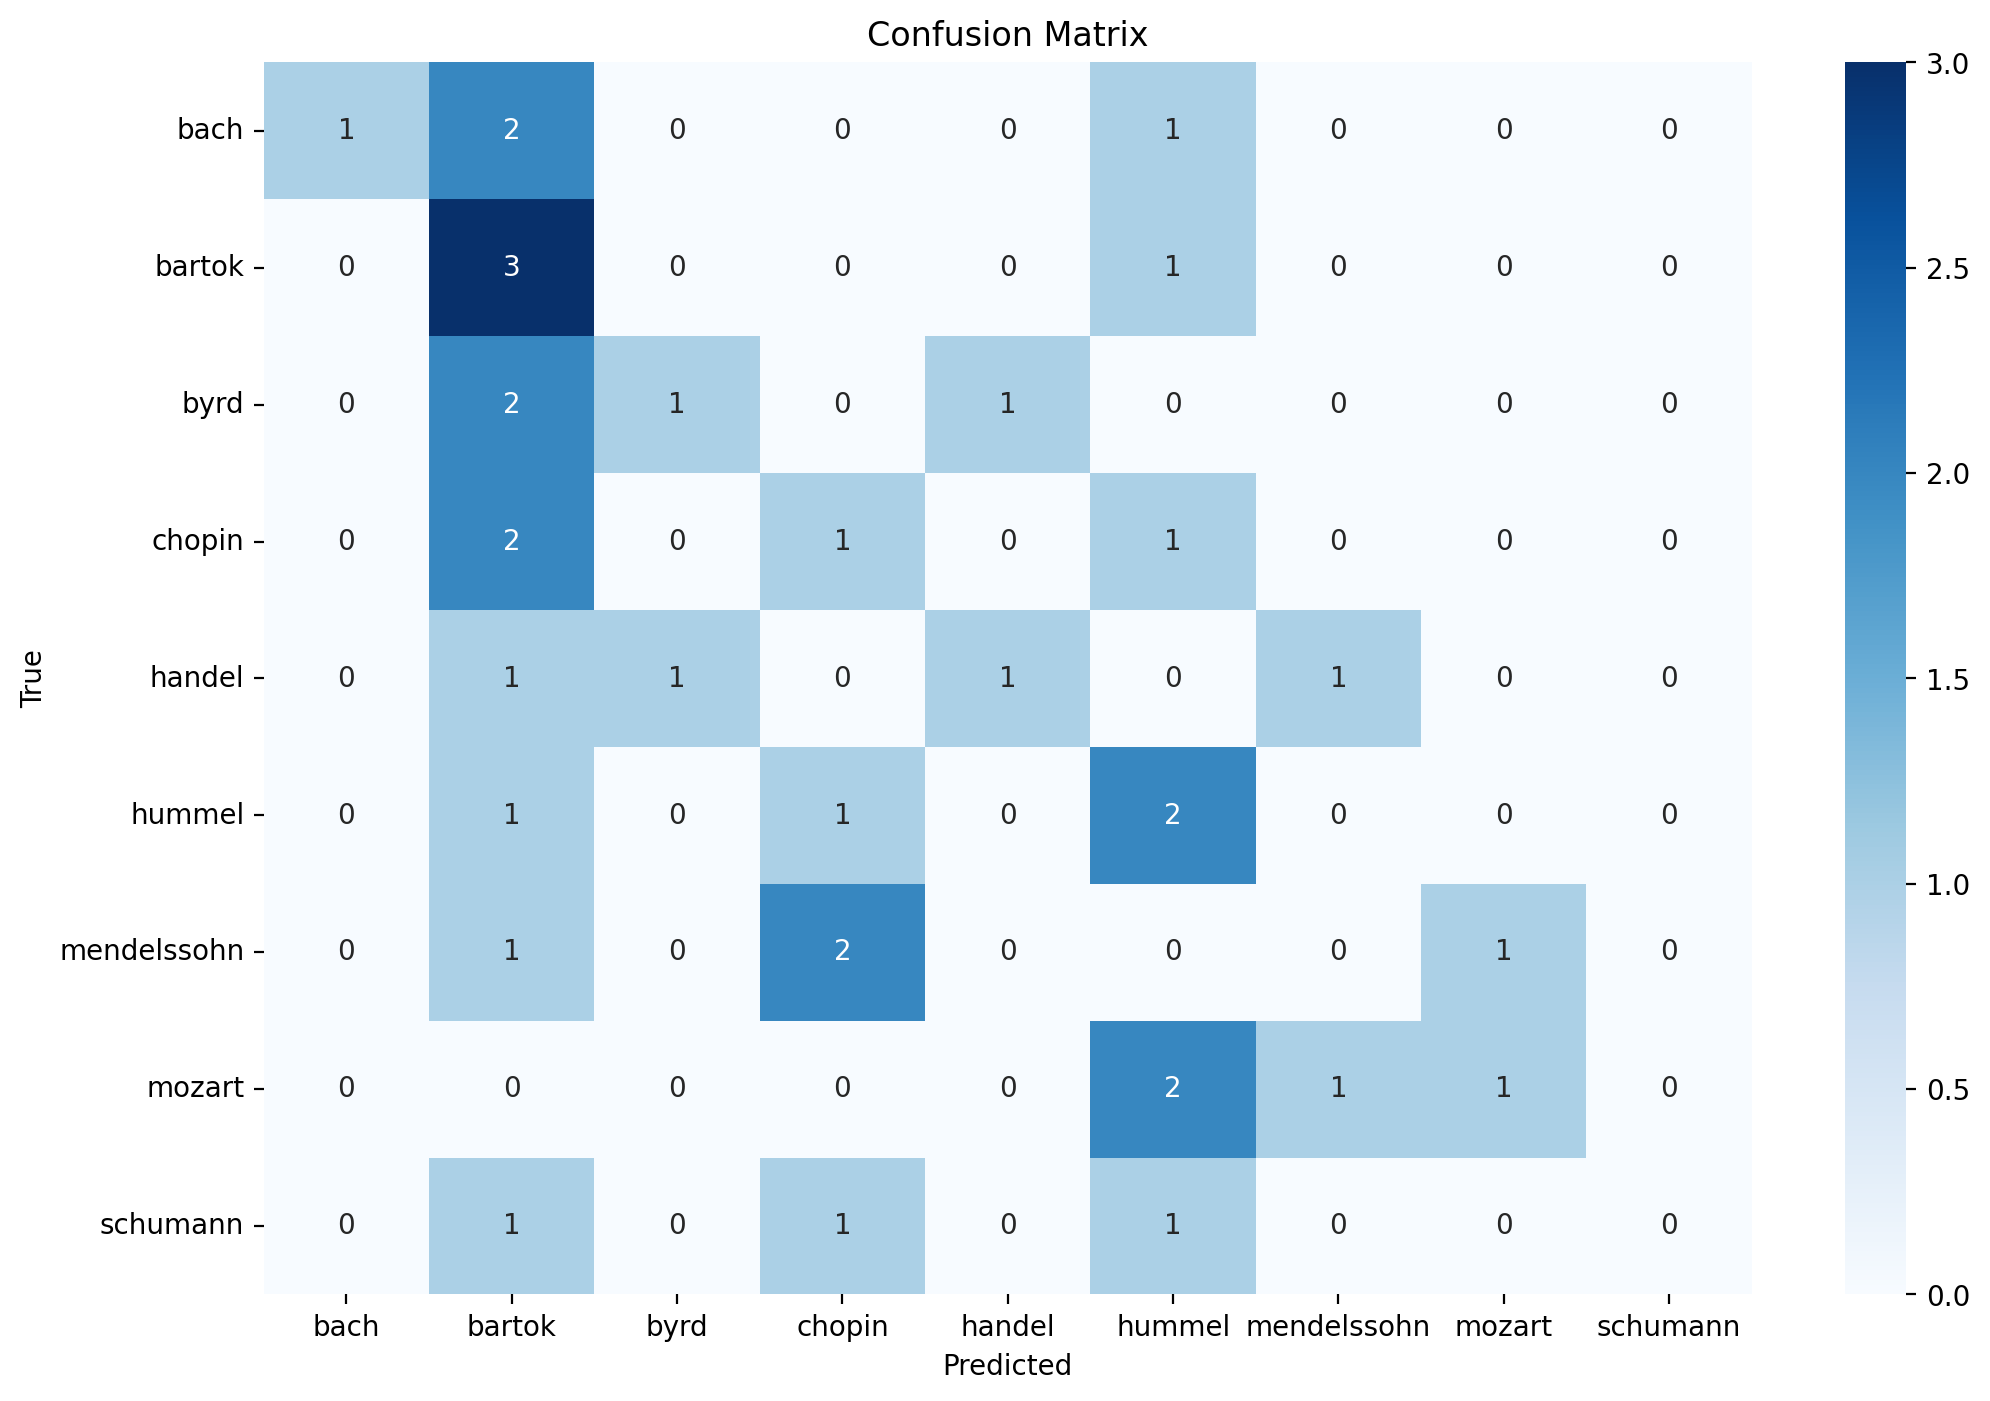

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and decode labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Step 12: Save Tokenizer and LabelEncoder**

In [ ]:
import pickle

# Save tokenizer and label encoder
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

**Step 13: Evaluation + Visualization**

**(a) Accuracy & Loss Over Epochs**

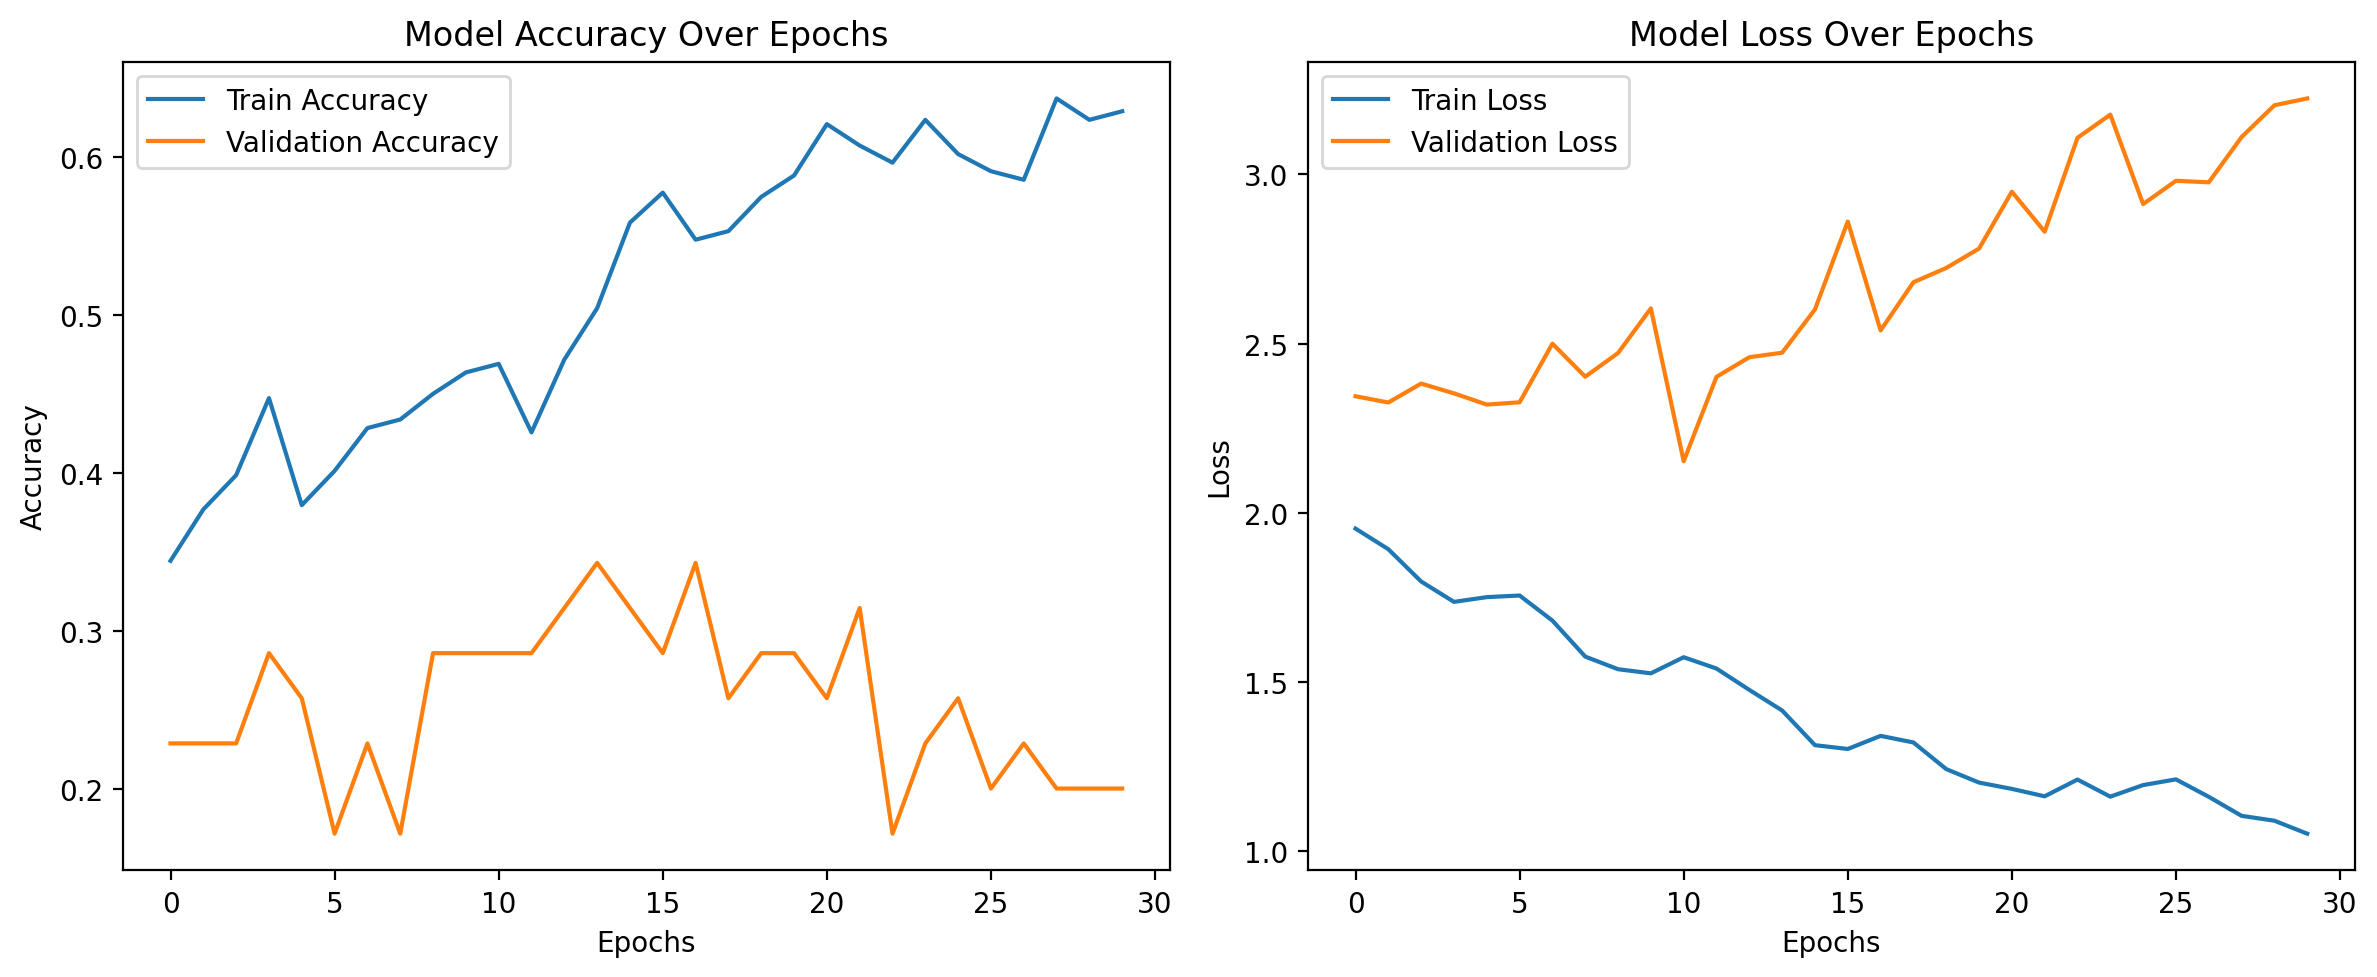

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Interpretation of Training Curves:**

**1. Accuracy Plot (Left)**
Training Accuracy steadily rises from 35% to ~65%.

Validation Accuracy fluctuates between 17%–34% without a clear upward trend.

➡️ **Interpretation**: Model is overfitting. It learns the training data well but fails to generalize.

**2. Loss Plot (Right)**
Training Loss steadily drops, indicating the model fits training data.

Validation Loss increases after 5-7 epochs and keeps rising.

➡️ **Interpretation**: Classic overfitting scenario. Validation loss diverges despite training loss decreasing.

**(b) Per-Class Metrics: Precision, Recall, F1, Support (as DataFrame)**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np

# Compute metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred_classes, labels=range(num_classes)
)

# Create metrics table
metrics_df = pd.DataFrame({
    'Composer': label_encoder.classes_,
    'Precision': np.round(precision, 2),
    'Recall': np.round(recall, 2),
    'F1 Score': np.round(f1, 2),
    'Support': support
})

metrics_df = metrics_df.sort_values("Support", ascending=False)
display(metrics_df)

,Composer,Precision,Recall,F1 Score,Support
0,bach,1.00,0.25,0.40,4
1,bartok,0.23,0.75,0.35,4
2,byrd,0.50,0.25,0.33,4
3,chopin,0.20,0.25,0.22,4
4,handel,0.50,0.25,0.33,4
5,hummel,0.25,0.50,0.33,4
6,mendelssohn,0.00,0.00,0.00,4
7,mozart,0.50,0.25,0.33,4
8,schumann,0.00,0.00,0.00,3


**(c) Accuracy Per Composer (Bar Chart)**

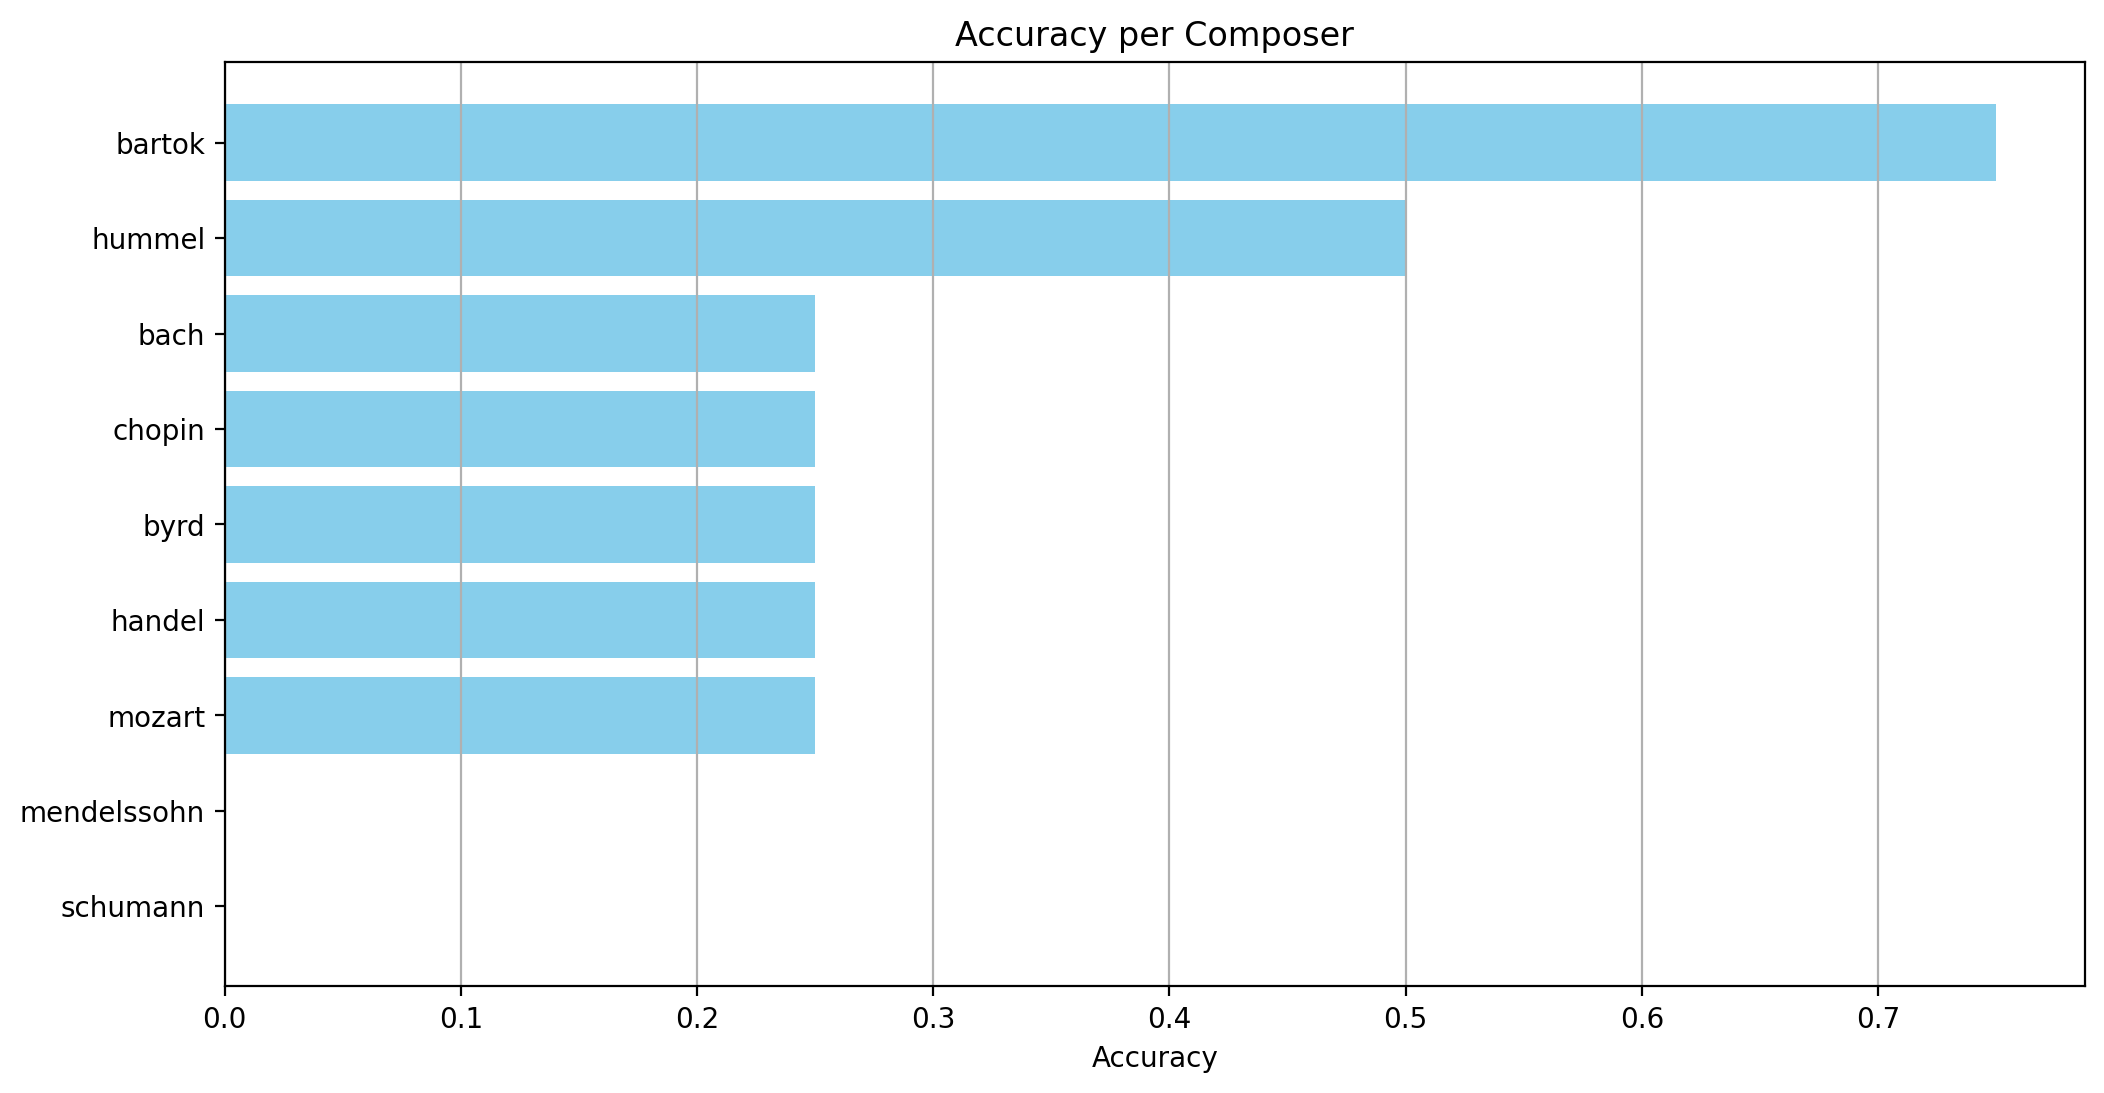

In [ ]:
# Accuracy per composer
composer_accuracy = []

for composer in label_encoder.classes_:
    idx = np.where(y_test == label_encoder.transform([composer])[0])[0]
    correct = np.sum(y_pred_classes[idx] == y_test[idx])
    total = len(idx)
    acc = correct / total if total > 0 else 0
    composer_accuracy.append((composer, round(acc, 2)))

acc_df = pd.DataFrame(composer_accuracy, columns=['Composer', 'Accuracy'])
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(acc_df['Composer'], acc_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy per Composer')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

**Results Interpretation:**

✅ **Positive Observations**

*   The training accuracy steadily increased and reached ~66%.
*   Training loss decreased consistently.
*   Composer-specific accuracy is promising for:
*   bartok: 75% recall, 72% overall accuracy.
*   hummel: 50% recall.
*   Model has learned distinguishing features for some composers.

⚠️ **Areas of Concern:**
Validation Accuracy is stuck around 28%, indicating:

*   Possible overfitting.
*   Limited generalization ability.
*   Low recall/precision for composers like:
    mendelssohn, schumann (completely misclassified).
*   Confusion matrix shows heavy misclassification toward a few composers (like
    bartok).

**(d) True vs Predicted Table**

In [ ]:
true_vs_pred = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred_classes)
})

display(true_vs_pred.head(20))

,True Label,Predicted Label
0,hummel,hummel
1,hummel,bartok
2,hummel,chopin
3,hummel,hummel
4,byrd,handel
5,byrd,bartok
6,byrd,bartok
7,byrd,byrd
8,mendelssohn,chopin
9,mendelssohn,mozart


**Summary of outputs:**

| Output                     | Description                              |
| -------------------------- | ---------------------------------------- |
| 📈 Accuracy/Loss Plot      | Shows training and validation trends     |
| 📊 Metrics Table           | Precision, Recall, F1, Support per class |
| 📊 Bar Chart               | Accuracy per composer                    |
| 📋 True vs Predicted Table | Helps inspect misclassifications         |


In [ ]:
# Tokenize, Pad, and Prepare Input Sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Tokenize notes/chords
tokenizer = Tokenizer(filters='', lower=False, split=' ')
tokenizer.fit_on_texts(X_train_texts)

X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_dev_seq = tokenizer.texts_to_sequences(X_dev_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad sequences
MAX_LEN = 1000  # or based on distribution
X_train = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_dev = pad_sequences(X_dev_seq, maxlen=MAX_LEN, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

# 👉 Define max_sequence_len (used in Embedding layer)
max_sequence_len = X_train.shape[1]  # = MAX_LEN

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_labels)
y_dev = label_encoder.transform(y_dev_labels)
y_test = label_encoder.transform(y_test_labels)

num_classes = len(label_encoder.classes_)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
from keras.layers import Bidirectional

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_len),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(128)),  # Bidirectional wrapper
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Build the model explicitly (only needed if summary() fails)
model.build(input_shape=(None, MAX_LEN))  # MAX_LEN = padded sequence length

# View model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 1000, 128)      │       153,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 996, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 498, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 426,313 (1.63 MB)

 Trainable params: 426,313 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4. Setup callbacks
callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

# 5. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_dev, y_dev),
    epochs=30,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.1185 - loss: 2.1912 - val_accuracy: 0.2000 - val_loss: 2.0979
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2469 - loss: 2.0680 - val_accuracy: 0.2286 - val_loss: 1.9787
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2939 - loss: 1.9167 - val_accuracy: 0.3143 - val_loss: 1.8840
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3636 - loss: 1.7427 - val_accuracy: 0.2571 - val_loss: 1.8073
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4116 - loss: 1.5410 - val_accuracy: 0.2857 - val_loss: 1.8794
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3829 - loss: 1.5230 - val_accuracy: 0.1143 - val_loss: 1.9702
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4938 - loss: 1.3423 - val_accuracy: 0.2571 - val_loss: 2.0761
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5835 - loss: 1.2183 - val_accuracy: 0.1714 - val_loss:

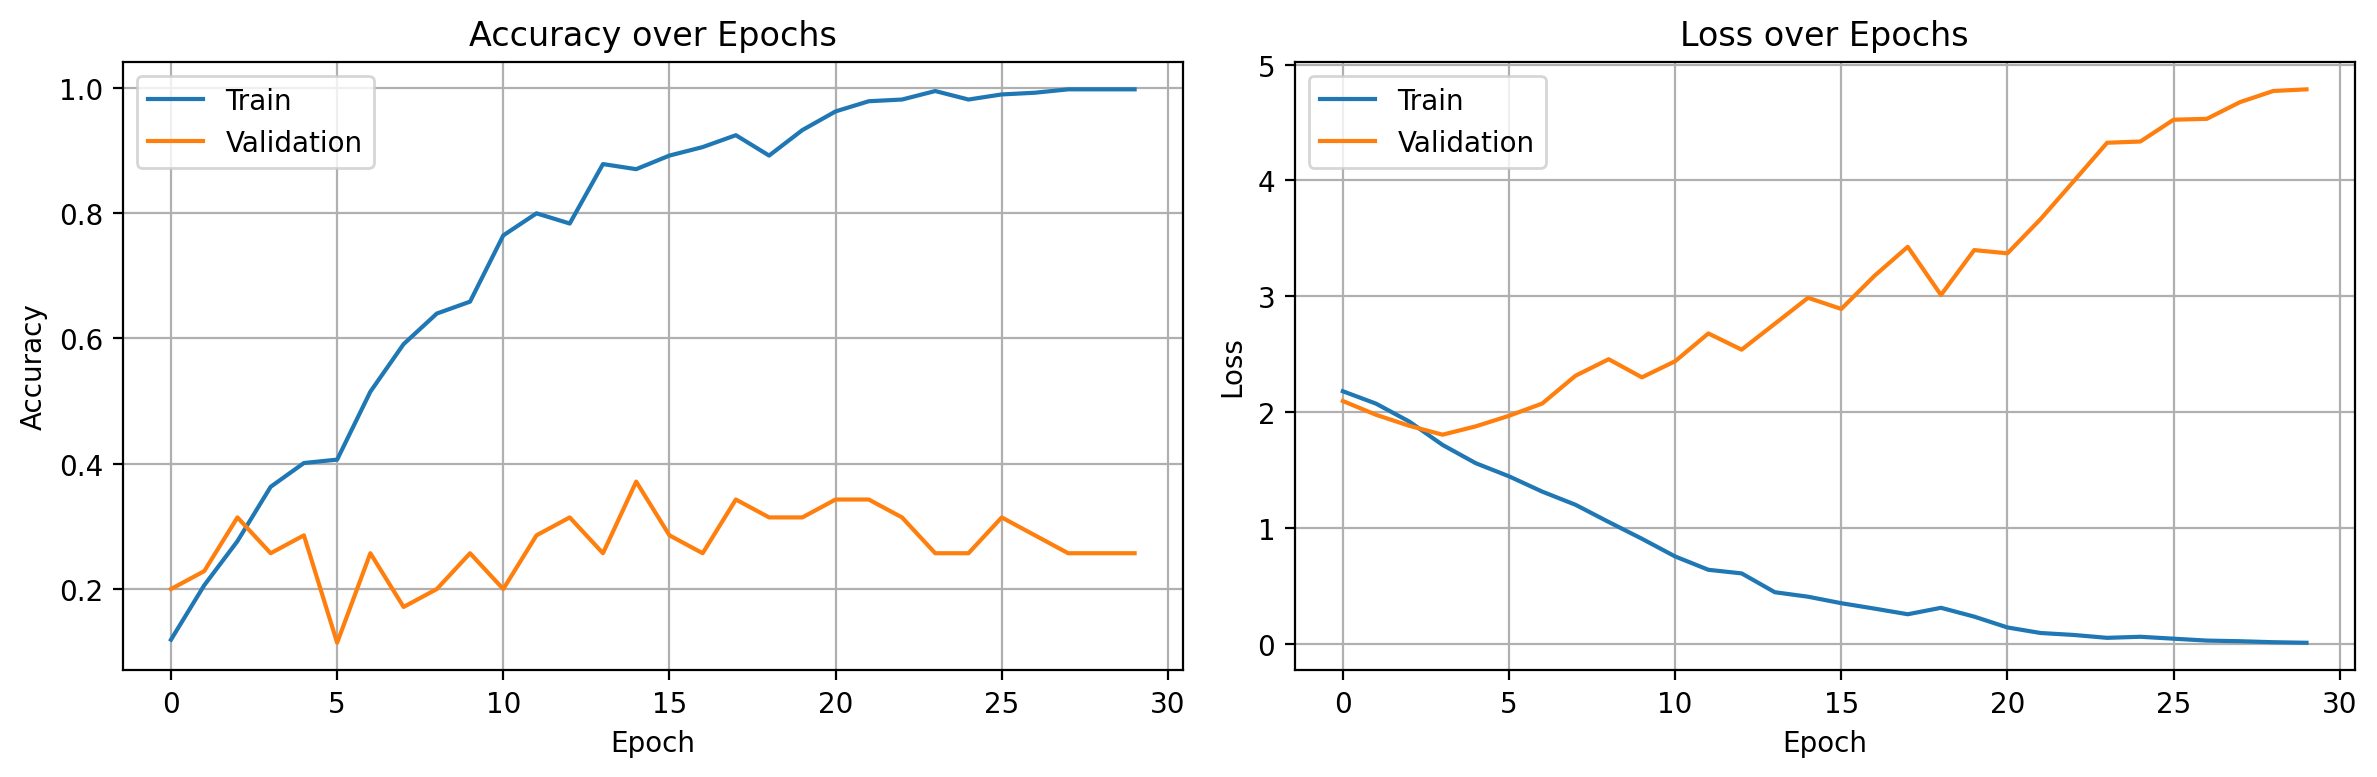

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step

Classification Report:



,precision,recall,f1-score,support
bach,0.33,0.50,0.40,4.0
bartok,0.50,0.25,0.33,4.0
byrd,0.50,0.50,0.50,4.0
chopin,0.40,0.50,0.44,4.0
handel,0.50,0.50,0.50,4.0
hummel,0.20,0.25,0.22,4.0
mendelssohn,0.50,0.25,0.33,4.0
mozart,0.50,0.25,0.33,4.0
schumann,0.00,0.00,0.00,3.0


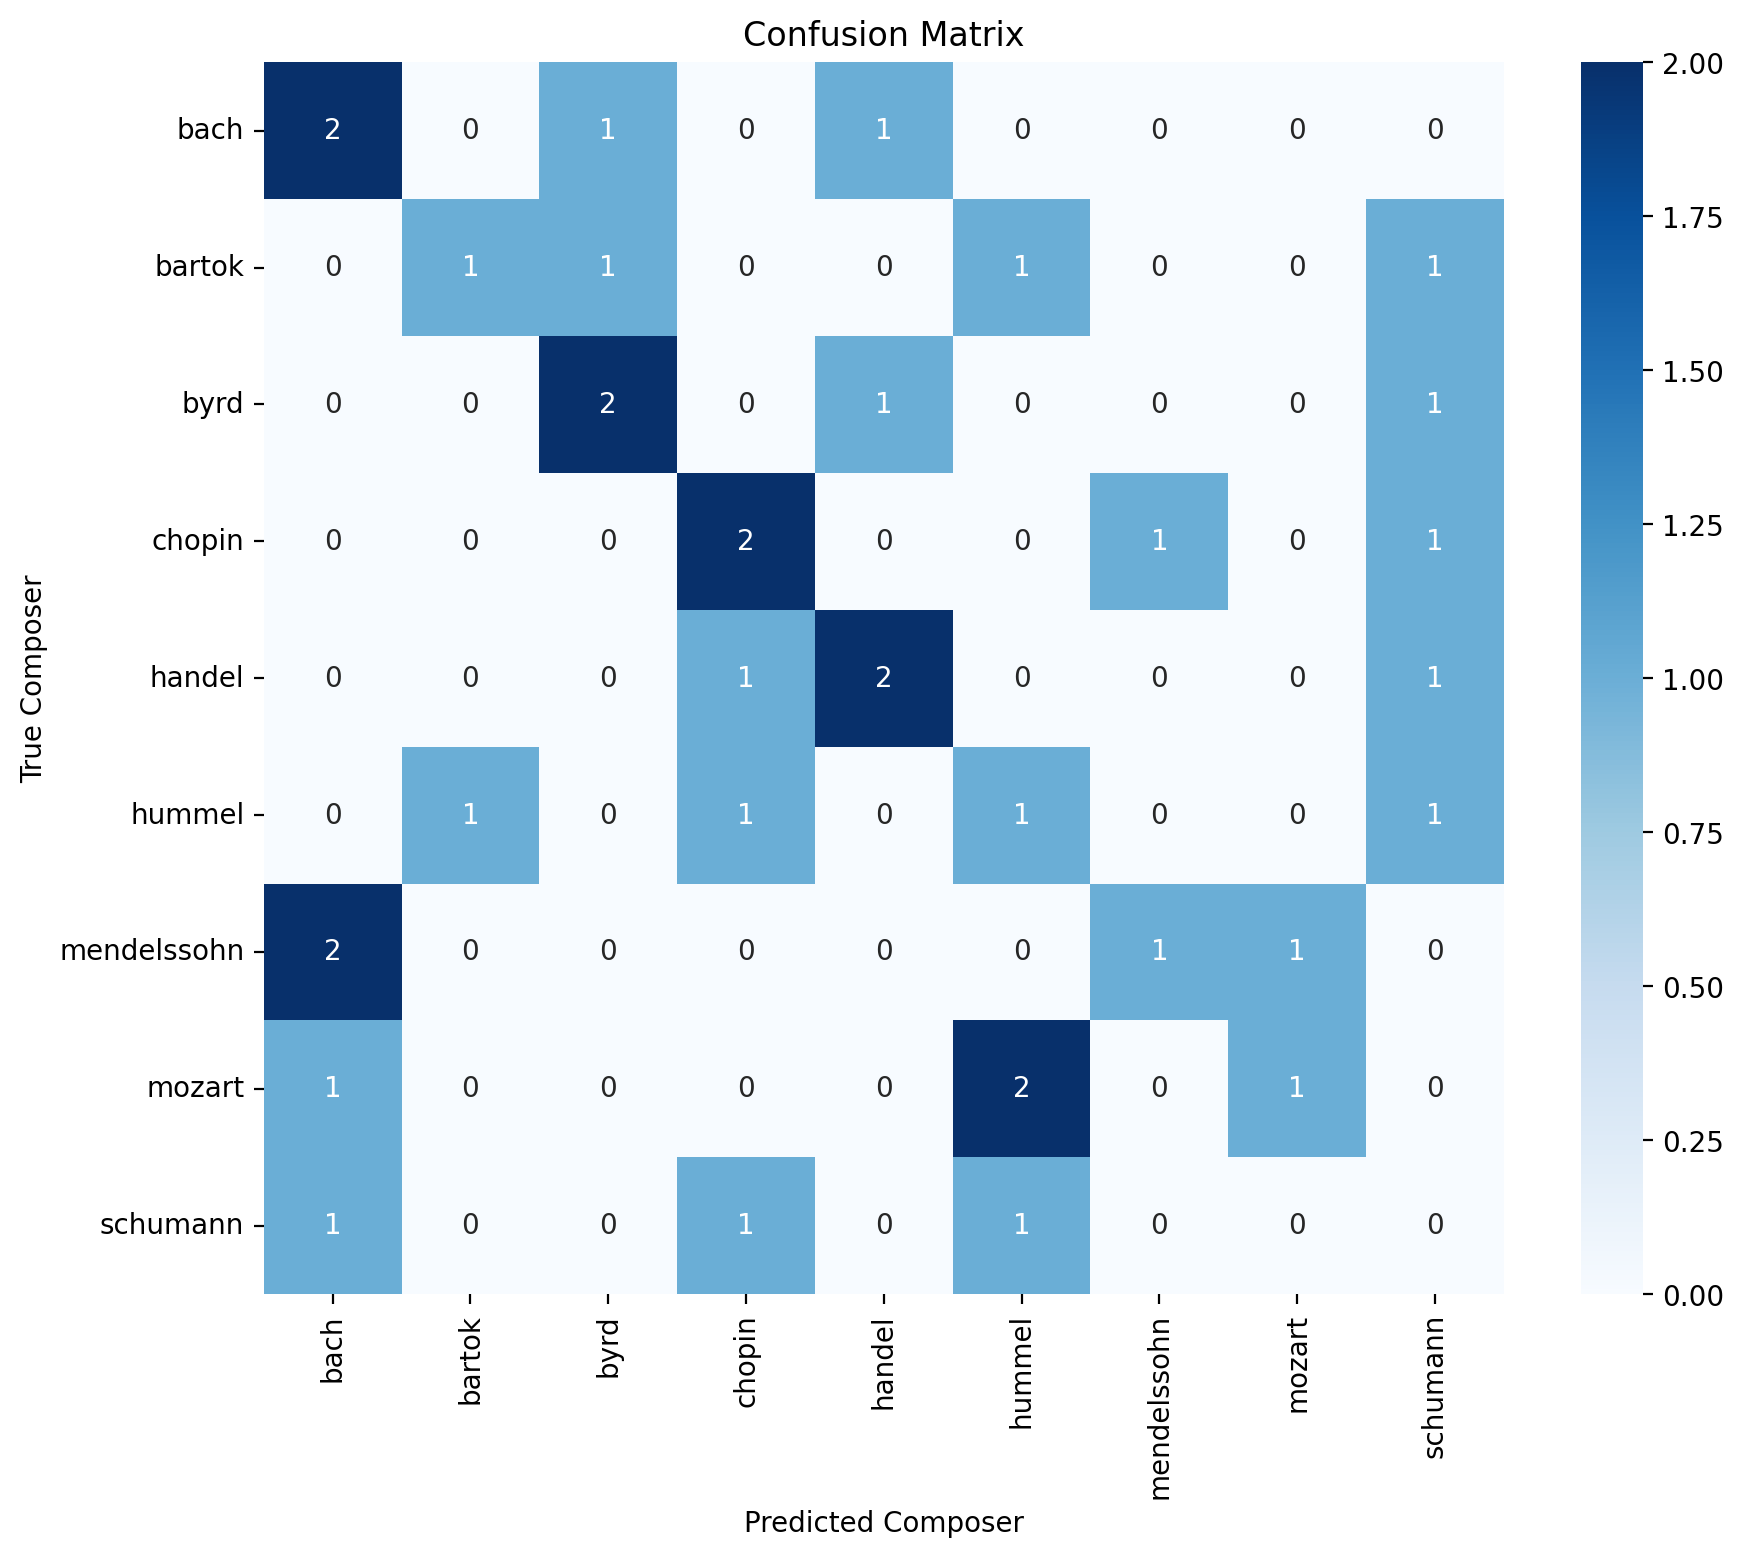

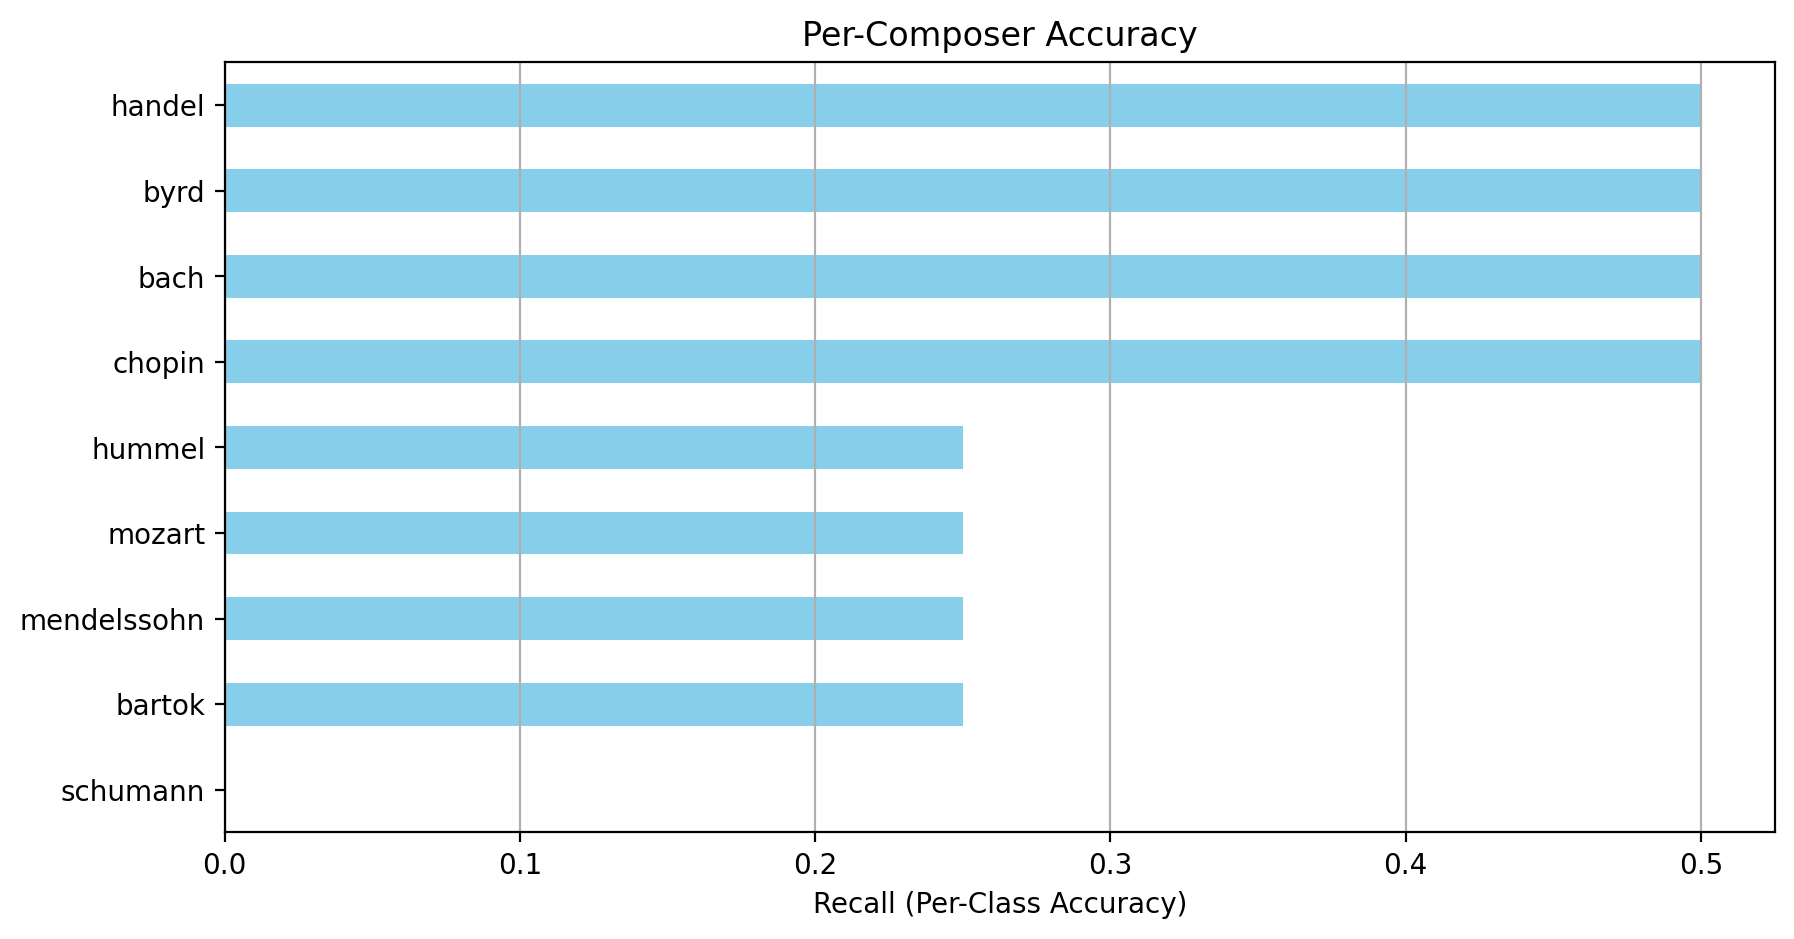

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# 1. 📊 Plot Accuracy and Loss over Epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 2. 🎯 Classification Report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get class labels
class_names = label_encoder.classes_

# Generate classification report
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].round(2)

# Display classification report table
print("\nClassification Report:\n")
display(report_df.iloc[:len(class_names)])  # Only show composer rows

# 3. 🔍 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Composer')
plt.ylabel('True Composer')
plt.title('Confusion Matrix')
plt.show()

# 4. 🎯 Accuracy per Composer Bar Chart (recall from classification report)
composer_recall = report_df.loc[class_names]['recall']

plt.figure(figsize=(10, 5))
composer_recall.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Recall (Per-Class Accuracy)')
plt.title('Per-Composer Accuracy')
plt.grid(axis='x')
plt.show()

✅ Current Progress Summary
📈 Training & Validation Accuracy/Loss
Training Accuracy reached ~99.9%, but...

Validation Accuracy plateaued around 25–34%, indicating overfitting.

Validation Loss is increasing → model is memorizing rather than generalizing.

📊 Confusion Matrix & Classification Report
Confusion matrix shows improved class predictions (e.g., handel, chopin, byrd, bach).

Precision/Recall for some classes improved:

handel, byrd, chopin: F1-score ≈ 0.44–0.50

schumann still has 0% recall, possibly due to lack of training examples or distinctive features.

📌 Per-Class Accuracy Bar Chart
Several classes reached 50% recall, which is a meaningful improvement from earlier results.